# Data Preprocessing - (Ames, Iowa Housing)

## Loading the Data and Initial Cleanup
Log and Scale Transformations in load_data

In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
library(ggplot2)
library(reshape2)

In [3]:
dim(housing_df)

[1] 2903   80

## One-hot Encoding of Categoraical Features

In [4]:
for(i in 1:length(factors_df)){
    if(is.factor(factors_df[,i])) {
        for(level in unique(factors_df[,i])){
              factors_df[paste(colnames(factors_df[i]), level, sep = "_")] <- ifelse(factors_df[,i] == level, 1, 0)
        }
    }
}

In [5]:
length(factors_df);length(numeric_log_sc_df)

[1] 437

[1] 24

## A Visual Preview of the Transformations
#### Scaling and Log-Scaling for 3 Numerical Features

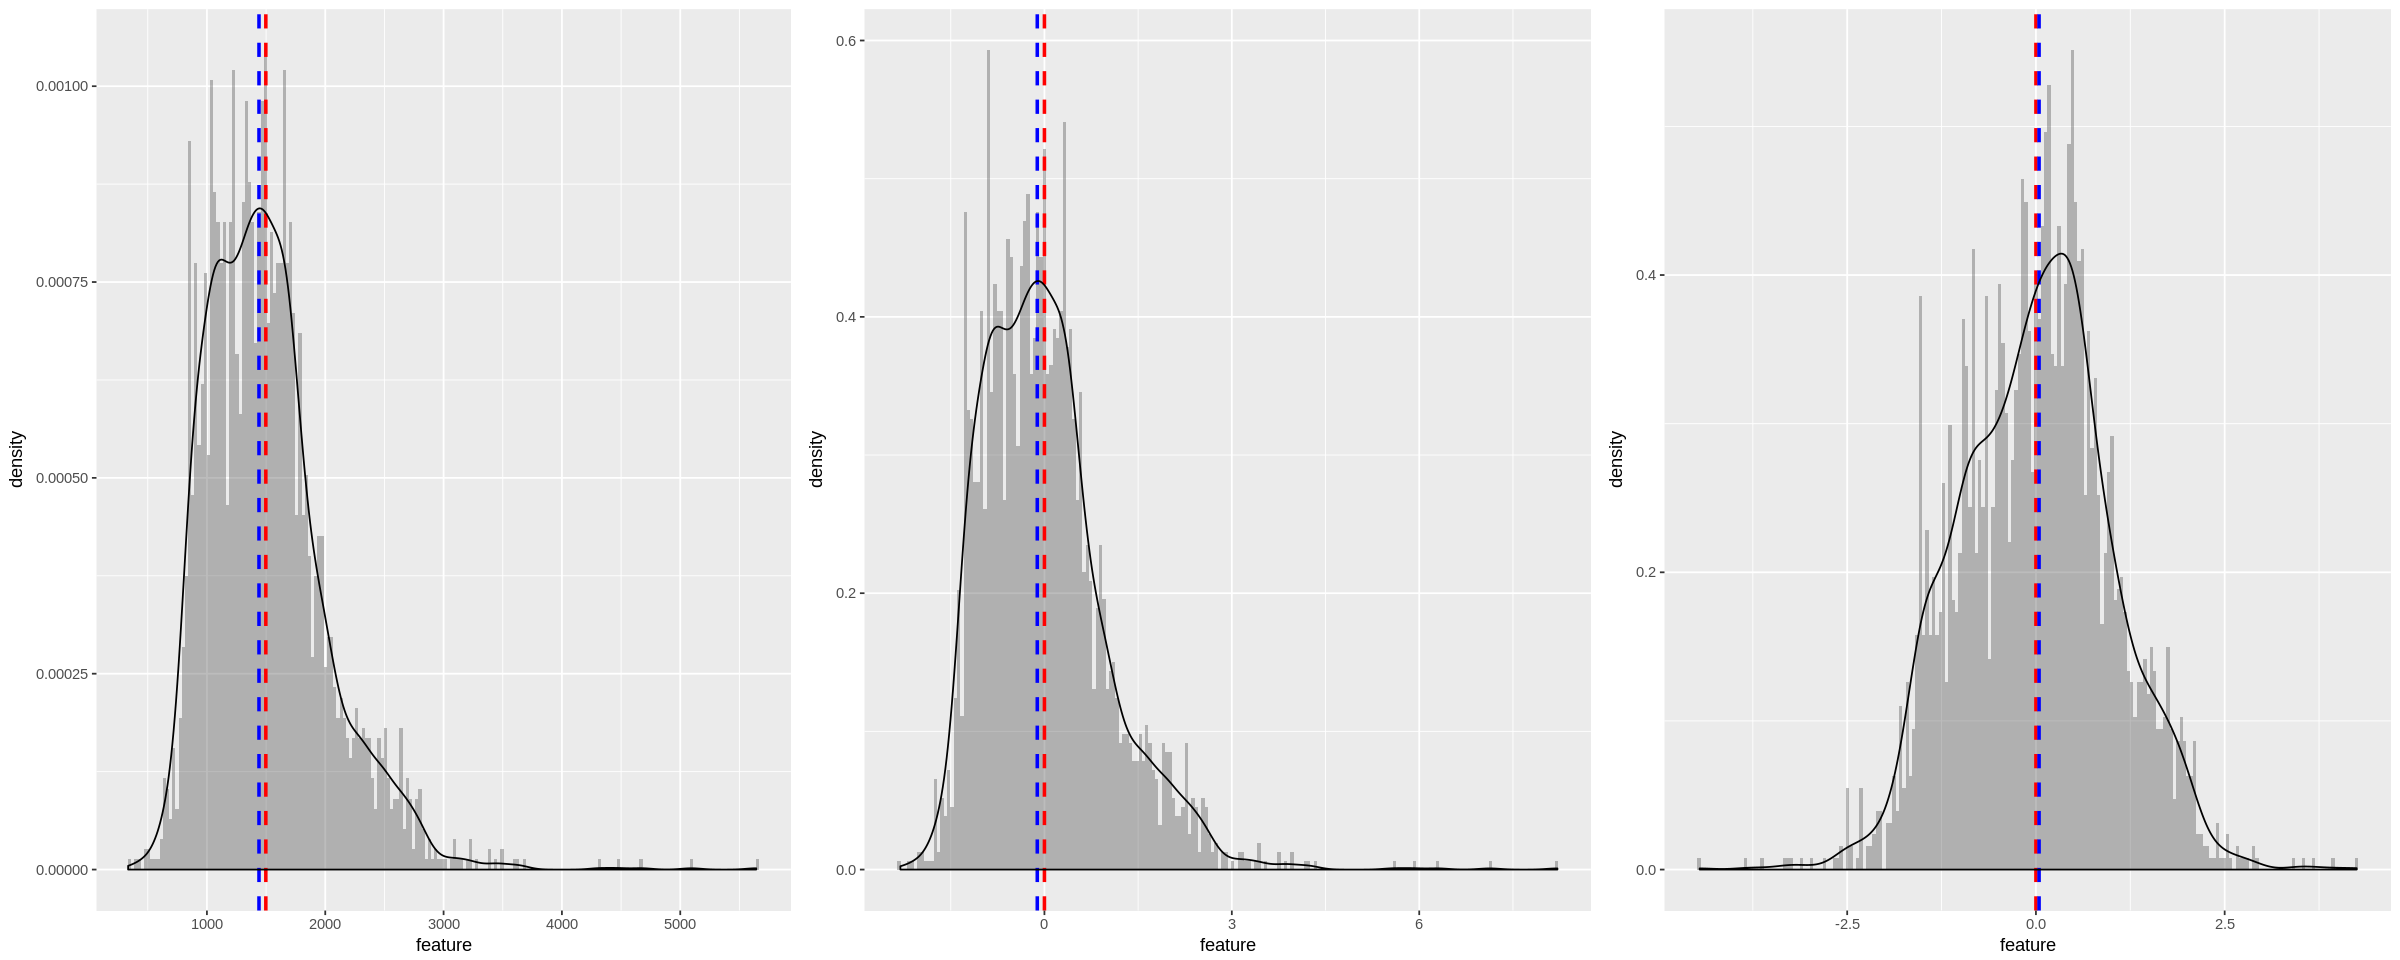

In [6]:
multiplot(
    hist_with_kde(housing_df$GrLivArea),
    hist_with_kde(numeric_sc_df$GrLivArea),
    hist_with_kde(numeric_log_sc_df$GrLivArea),
    cols = 3
    )

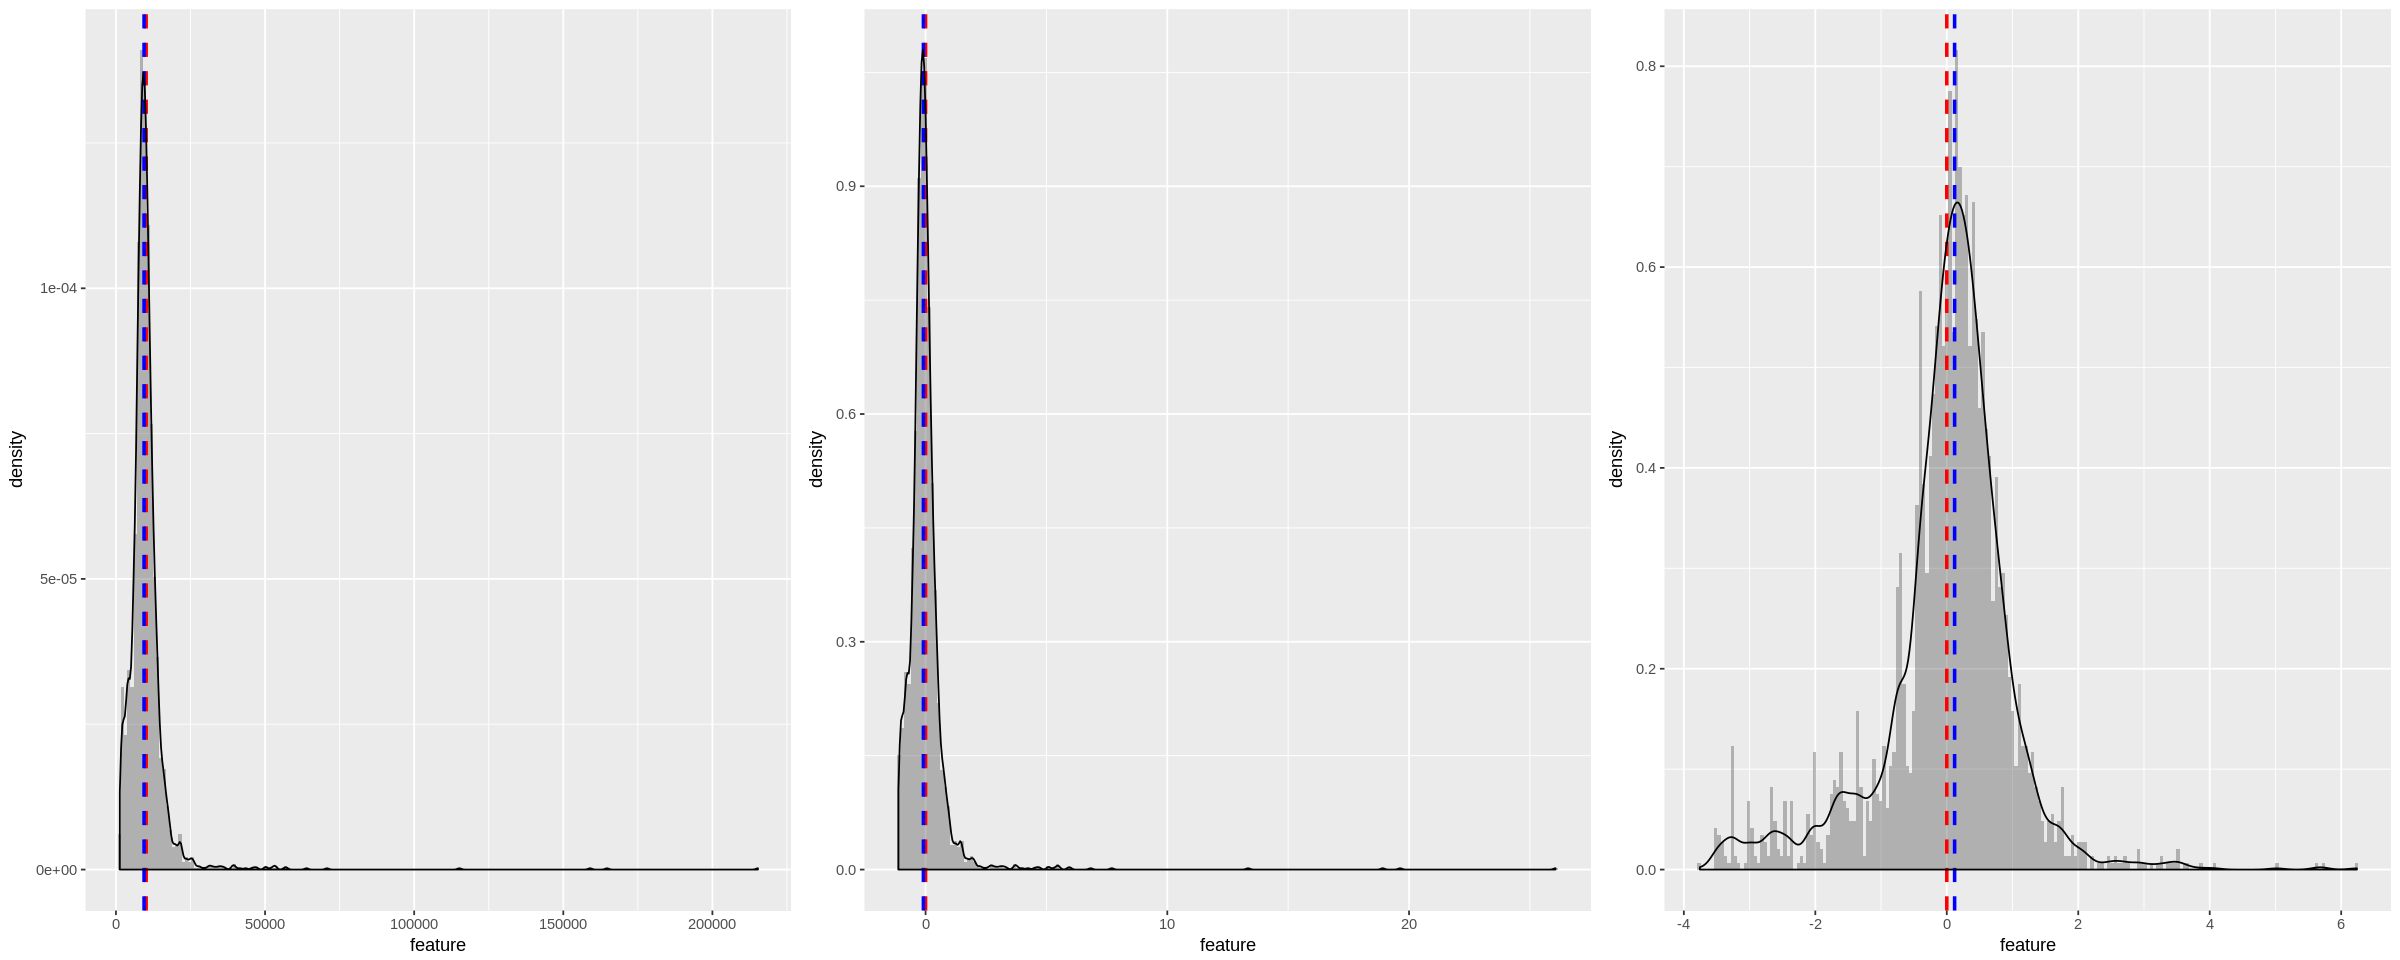

In [7]:
multiplot(
    hist_with_kde(housing_df$LotArea),
    hist_with_kde(numeric_sc_df$LotArea),
    hist_with_kde(numeric_log_sc_df$LotArea),
    cols = 3
    )

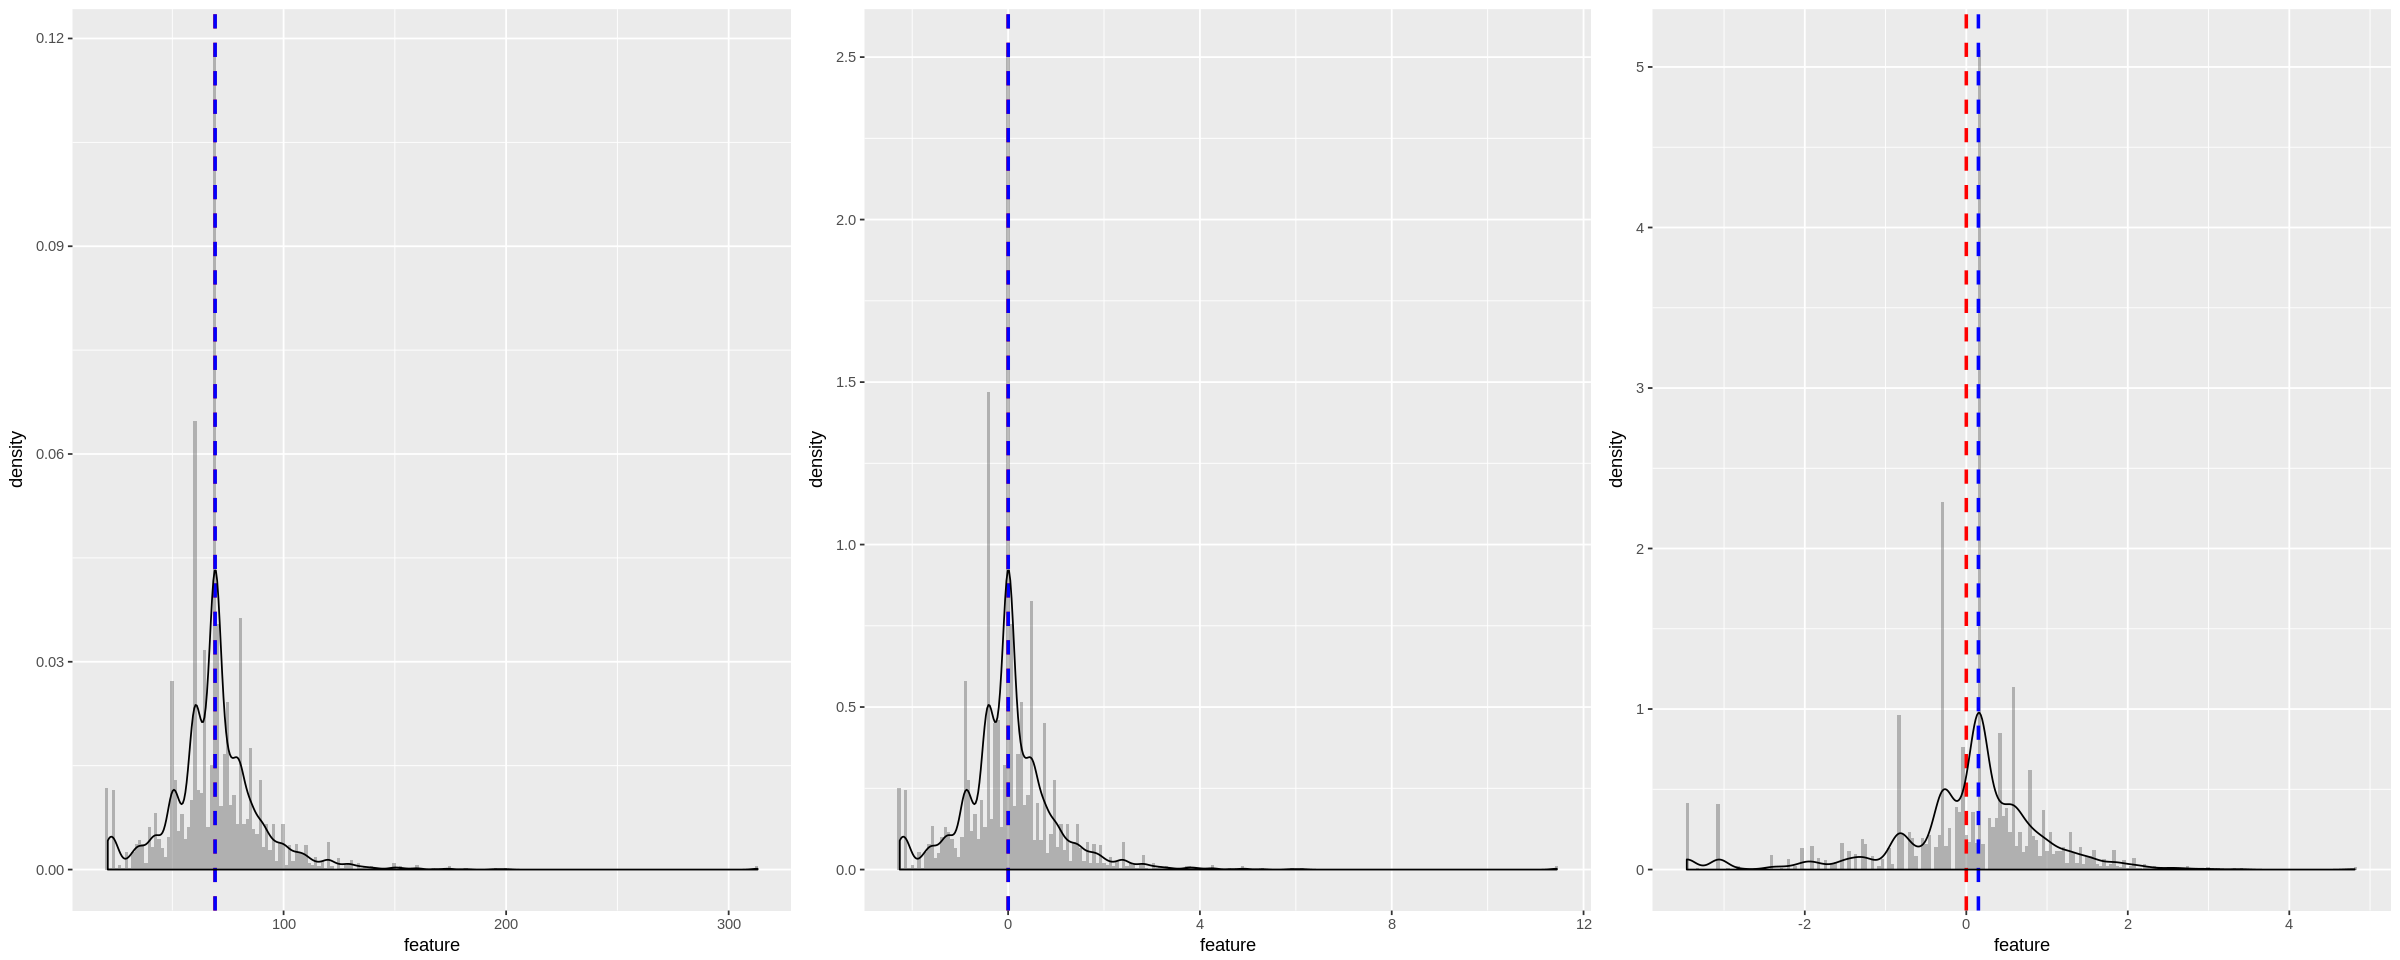

In [8]:
multiplot(
    hist_with_kde(housing_df$LotFrontage),
    hist_with_kde(numeric_sc_df$LotFrontage),
    hist_with_kde(numeric_log_sc_df$LotFrontage),
    cols = 3
    )

## Correlation Heatmap for Numerical Features

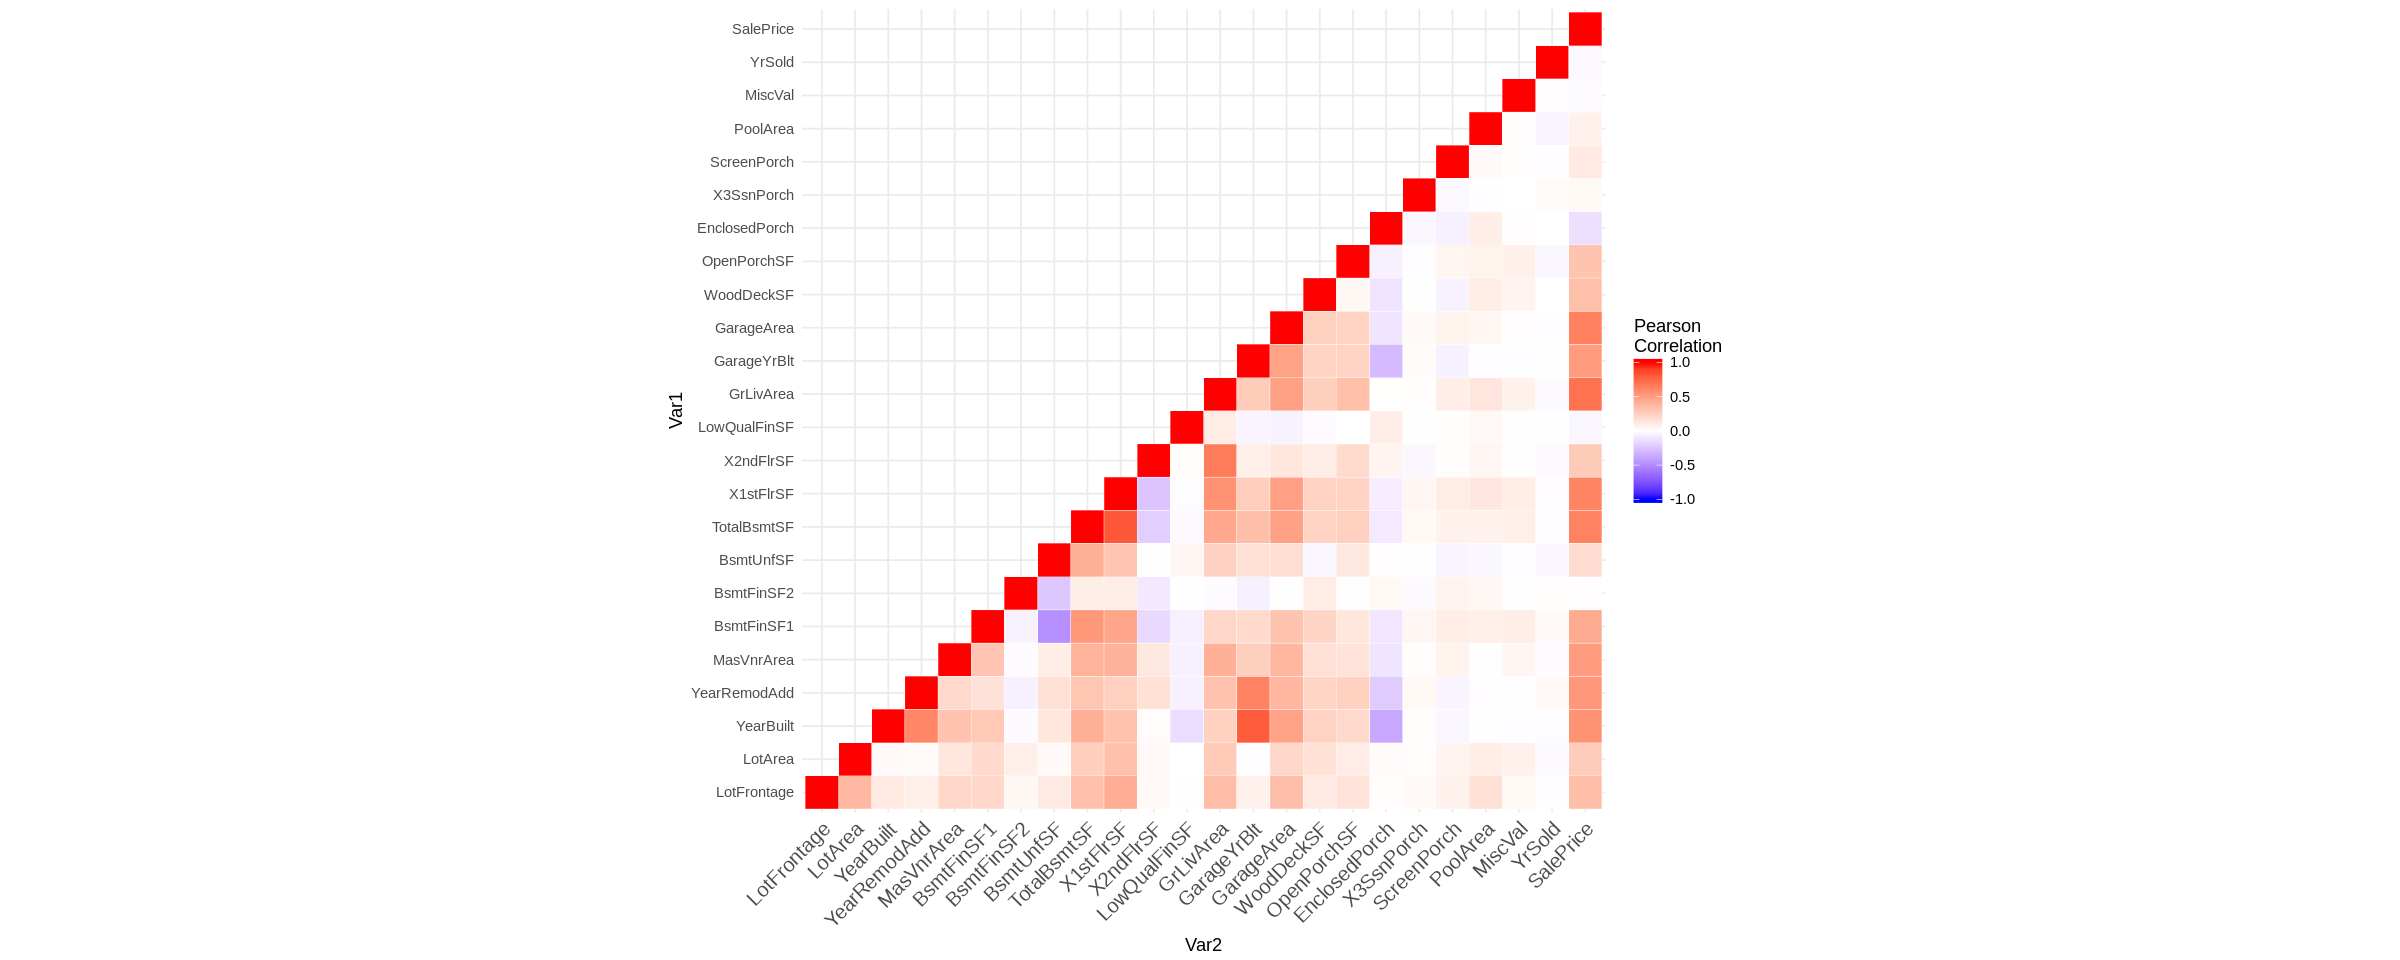

In [9]:
cormat = cor(numeric_df)
cormat[lower.tri(cormat)] <- NA
melted_cormat <- melt(cormat, na.rm = T)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

In [10]:
cor(numeric_df)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,⋯,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000000,0.364535686,0.115310484,0.085371904,0.205099521,0.20337177,0.040870892,0.107969377,0.333798298,0.42432903,⋯,0.339037360,0.104883832,0.1458776430,0.014793697,0.0259063175,0.071227129,0.161691565,0.0363485669,-0.006788432,0.339777480
LotArea,0.364535686,1.000000000,0.024544719,0.021283006,0.128120647,0.19283784,0.084550752,0.025873823,0.257858701,0.32375507,⋯,0.212268324,0.159884267,0.0975677379,0.019278643,0.0165659725,0.056014476,0.094456860,0.0697873568,-0.022219972,0.265791961
YearBuilt,0.115310484,0.024544719,1.000000000,0.609376985,0.313289239,0.28374751,-0.025862855,0.126842791,0.410009481,0.31717210,⋯,0.481206011,0.232366663,0.1963872016,-0.374339190,0.0166806819,-0.039494591,0.002707547,-0.0103874984,-0.012294546,0.558468153
YearRemodAdd,0.085371904,0.021283006,0.609376985,1.000000000,0.197277680,0.15423094,-0.060528729,0.163777324,0.299534427,0.24505256,⋯,0.376160377,0.220415595,0.2394868755,-0.221144631,0.0383812066,-0.044932851,-0.010979753,-0.0024604255,0.034352589,0.532265280
MasVnrArea,0.205099521,0.128120647,0.313289239,0.197277680,1.000000000,0.30168769,-0.016196034,0.091278584,0.396815290,0.40003636,⋯,0.373508351,0.165389152,0.1449333350,-0.110618252,0.0137004491,0.065436718,0.004568327,0.0448734992,-0.017745365,0.508606468
BsmtFinSF1,0.203371770,0.192837842,0.283747509,0.154230943,0.301687686,1.00000000,-0.054561624,-0.477926640,0.536410135,0.46258823,⋯,0.309113017,0.225549032,0.1251485459,-0.106264572,0.0507817801,0.096341271,0.084563691,0.0933508815,0.024592493,0.433795659
BsmtFinSF2,0.040870892,0.084550752,-0.025862855,-0.060528729,-0.016196034,-0.05456162,1.000000000,-0.238854351,0.091034069,0.08724552,⋯,0.005437616,0.098610303,-0.0035229341,0.032791064,-0.0235527379,0.062440693,0.044303239,-0.0053898156,0.007522091,0.008021748
BsmtUnfSF,0.107969377,0.025873823,0.126842791,0.163777324,0.091278584,-0.47792664,-0.238854351,1.000000000,0.411134827,0.30084531,⋯,0.165770813,-0.038869725,0.1197662264,0.008184606,-0.0052515372,-0.047738132,-0.032033500,-0.0100270577,-0.036129923,0.183367984
TotalBsmtSF,0.333798298,0.257858701,0.410009481,0.299534427,0.396815290,0.53641013,0.091034069,0.411134827,1.000000000,0.81217269,⋯,0.487148673,0.232527551,0.2475429745,-0.089086789,0.0381953436,0.076101372,0.072590797,0.0844628881,-0.007705919,0.634647335
X1stFlrSF,0.424329034,0.323755065,0.317172097,0.245052559,0.400036358,0.46258823,0.087245524,0.300845313,0.812172694,1.00000000,⋯,0.495033767,0.233831075,0.2274206755,-0.070312392,0.0449933617,0.100604160,0.123688835,0.0945617502,-0.011212654,0.625499368


## Top 5 Largest Correlation Numbers for SalePrice
YearBuilt,TotalBsmtSF,X2stFlrSF,GarageArea,GrLivArea